In [5]:
%load_ext autoreload
%autoreload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline

In [6]:
df_in = pd.read_csv('chicago_taxi.csv')
df_in.head()
df_in = df_in.sample(n=100000)

In [8]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 273427 to 125487
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     100000 non-null  object 
 1   Taxi ID                     99995 non-null   object 
 2   Trip Start Timestamp        100000 non-null  object 
 3   Trip End Timestamp          99999 non-null   object 
 4   Trip Seconds                99988 non-null   float64
 5   Trip Miles                  99998 non-null   float64
 6   Pickup Census Tract         63097 non-null   float64
 7   Dropoff Census Tract        62791 non-null   float64
 8   Pickup Community Area       93326 non-null   float64
 9   Dropoff Community Area      91331 non-null   float64
 10  Fare                        99990 non-null   float64
 11  Tips                        99990 non-null   float64
 12  Tolls                       99990 non-null   float64
 13  Extras   

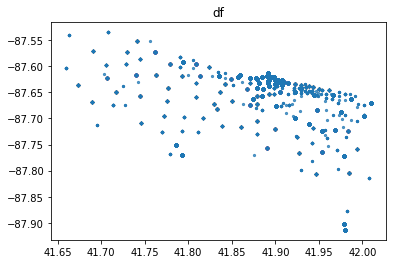

array([[ 41.89250778, -87.62621491],
       [ 41.87400538, -87.66351755],
       [ 41.92268628, -87.64948873],
       ...,
       [ 41.79259236, -87.76961545],
       [ 41.8789145 , -87.70589713],
       [ 41.87925508, -87.642649  ]])

In [9]:
X = df_in[["Pickup Centroid Latitude","Pickup Centroid Longitude"]].to_numpy()

X_no_nan = X[~np.isnan(X).any(axis=1),:]

plt.scatter(df_in["Pickup Centroid Latitude"],df_in["Pickup Centroid Longitude"], s=5, alpha=0.75)
plt.title('df')
plt.show()

X_no_nan


## Preprocessing data

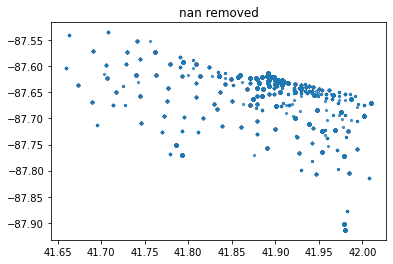

In [10]:
plt.scatter(X_no_nan[:,0],X_no_nan[:,1], s=5, alpha=0.75)
plt.title('nan removed')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled  = scaler.fit_transform(X_no_nan)

x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df

,0,1
0,-0.122481,0.465615
1,-0.549104,0.018980
2,0.573366,0.186951
3,-0.437039,0.477860
4,-0.133217,0.397977
...,...,...
93327,-0.387951,0.387410
93328,-0.549104,0.018980
93329,-2.426302,-1.251359
93330,-0.435911,-0.488442


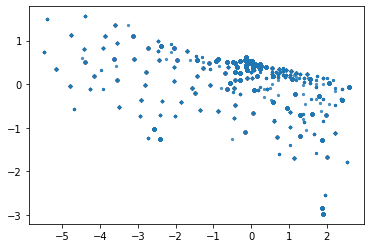

In [12]:
plt.scatter(x_scaled_df[0],x_scaled_df[1], s=5, alpha=0.75)
plt.show()

In [13]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_scaled_df)
x_principal = pd.DataFrame(x_principal)
x_principal.columns= ['P1','P2']
x_principal.head()

,lat,lon
0,0.415846,-0.242632
1,0.401696,0.374854
2,-0.273237,-0.537625
3,0.646931,-0.028865
4,0.375611,-0.187213


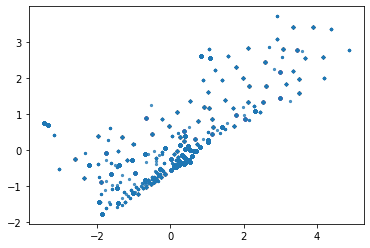

In [14]:
plt.scatter(x_principal['P1'],x_principal['P2'], s=5, alpha=0.75)
plt.show()

In [15]:
db = DBSCAN(eps=0.1, min_samples=5, n_jobs=4)

In [16]:
db.fit(x_principal)
db.labels_

array([ 0,  1,  2, ..., 37, 76, 15])

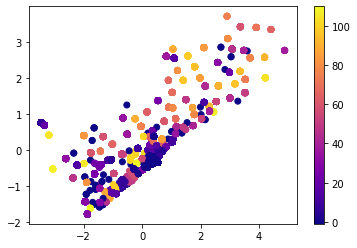

In [17]:
color_clusters = db.fit_predict(x_principal)
plt.scatter(x_principal['P1'], x_principal['P2'], c=color_clusters, cmap='plasma')
plt.colorbar()